# Introduction
This notebook is created for research work on Fake News Detection using unsupervised learning techninques. For this we have chosen clustering algorithms. This research work was done under supervision of Dr. Sajida Parveen with collaboration of Affan Ali Tahir at National Textile University. The dataset was collected from [Github](https://github.com/somenath203/Clustering-News-Unsupervised-Machine-Learning/blob/main/news_data.tsv). In previous work there were only three algorithms applied i.e., k means, k medoids and agglomerative heirarichal clustering with very minimal results. Previuosly K means was trained for 6 clusters, k medoids for 5 and agglomerative for 3.


---


 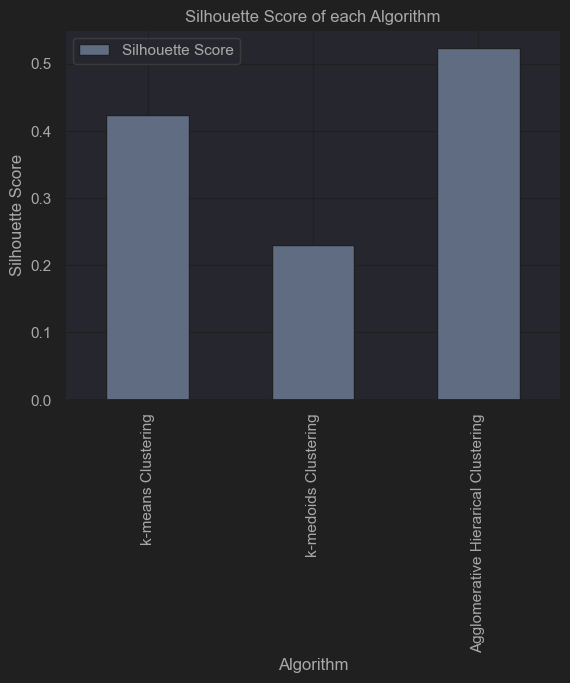


---

We have highly optimizied these results and also added two more clutering techniques into this i.e., Gaussian Mixture Models and DBSCAN.
### **Methodlogy**
Our methodology in this research was as similar to the following:


*   Collecting and Reading Dataset
*   Feature Extraction
*   Removing null values and Balancing Label Count
*   Data Preprocessing
*   Data Vectorization
*   Dimensionality Reduction
*   Model Training (finding optimat no. of cluster and training all clustering algorithms)
*   Calculate Results




## Installing necessary libraries

In [1]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.2 MB/s eta 0:00:00



## Importing all the necessary Dependencies

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from wordcloud import WordCloud

## Reading the dataset


In [16]:
# Read the dataset
news_data = pd.read_table('./news_data.tsv', delimiter='\t')

In [18]:
news_data.head()

,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0.1,0.2,0.3,a mailer
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


## Dropping all the un-necessary columns


In [19]:
# Drop un-necessary columns
news_data.drop(columns=['2635.json', 'abortion', 'dwayne-bohac', 'State representative', 'Texas', 'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer'], inplace=True)


In [20]:
# Rename columns
news_data.columns = ['label', 'news_text']


In [21]:
news_data.head()

,label,news_text
0,half-true,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
2,false,Health care reform legislation is likely to ma...
3,half-true,The economic turnaround started at the end of ...
4,true,The Chicago Bears have had more starting quart...


## Checking for null values in the dataset


In [22]:
# Check for null values
print("Null values in dataset:")
print(news_data.isnull().sum())


Null values in dataset:
label        0
news_text    0
dtype: int64


## Counting number of data points for each label



In [23]:
each_label_count = news_data['label'].value_counts()
each_label_count

label
half-true      2114
false          1994
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64

## Balancing the label count to 830 data points for each label



In [24]:
news_data_half_true_only = news_data[news_data['label'] == 'half-true']
news_data_false_only = news_data[news_data['label'] == 'false']
news_data_mostly_true_only = news_data[news_data['label'] == 'mostly-true']
news_data_true_only = news_data[news_data['label'] == 'true']
news_data_barely_true_only = news_data[news_data['label'] == 'barely-true']
news_data_pants_fire_only = news_data[news_data['label'] == 'pants-fire']



In [25]:
# Sample 830 data points for each label
news_data_half_true_only_sample = news_data_half_true_only.sample(830, random_state=42)
news_data_false_only_sample = news_data_false_only.sample(830, random_state=42)
news_data_mostly_true_only_sample = news_data_mostly_true_only.sample(830, random_state=42)
news_data_true_only_sample = news_data_true_only.sample(830, random_state=42)
news_data_barely_true_only_sample = news_data_barely_true_only.sample(830, random_state=42)
news_data_pants_fire_only_sample = news_data_pants_fire_only.sample(830, random_state=42)




In [28]:
# Concatenate the sampled data
news_data = pd.concat([news_data_half_true_only_sample, news_data_false_only_sample, news_data_mostly_true_only_sample, news_data_true_only_sample, news_data_barely_true_only_sample, news_data_pants_fire_only_sample], axis=0)
# Shuffle the rows of the DataFrame
news_data = news_data.sample(frac=1.0, random_state=42)


In [29]:
news_data.head()

,label,news_text
9822,false,Says Russ Feingold voted to give Social Securi...
8580,barely-true,Says Texas proved in court that more than 200 ...
8410,false,Says the New York Times can write a story that...
721,mostly-true,Says in the last six months of the Bush admini...
9156,false,A (state) trooper with 10 years on the force i...


## **Preprocessing Data**
The preprocessing function ensures uniformity in text data by converting it to lowercase and removing non-alphanumeric characters, stopwords, and punctuation, enabling consistent analysis across all entries.

###Preprocessing Steps:
*   Converting all data in lower case
*   Tokenization
*   Remove non-alphanumeric characters:
*   Remove stopwords and punctuation:
*   Stemming
*   Joining tokens








In [30]:
# Preprocessing the news texts
nltk.download('stopwords')
nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    word_arr = []
    for i in text:
        if i.isalnum():
            word_arr.append(i)
    text = word_arr[:]
    word_arr.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            word_arr.append(i)
    text = word_arr[:]
    word_arr.clear()
    for i in text:
        word_arr.append(ps.stem(i))
    return " ".join(word_arr)


In [32]:
news_data['preprocessed_news_text'] = news_data['news_text'].apply(preprocess_text)
news_data.head()


,label,news_text,preprocessed_news_text
9822,false,Says Russ Feingold voted to give Social Securi...,say russ feingold vote give social secur benef...
8580,barely-true,Says Texas proved in court that more than 200 ...,say texa prove court 200 dead peopl vote lates...
8410,false,Says the New York Times can write a story that...,say new york time write stori know fals yet ca...
721,mostly-true,Says in the last six months of the Bush admini...,say last six month bush administr lost million...
9156,false,A (state) trooper with 10 years on the force i...,state trooper 10 year forc get 500 year troope...


## Creating Word Cloud

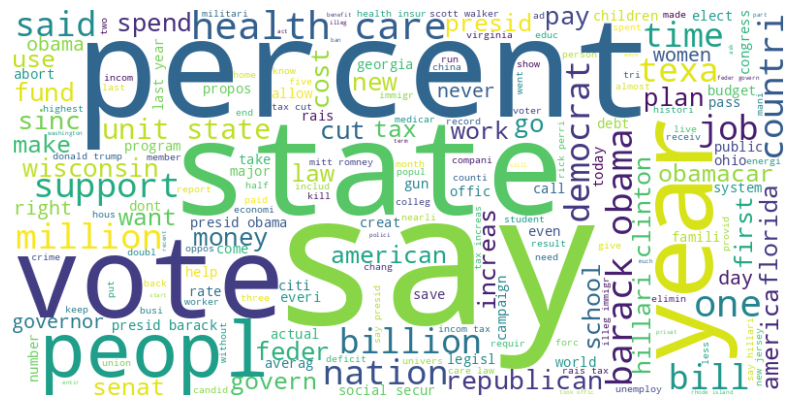

In [33]:
# Concatenate preprocessed text and generate word cloud
preprocessed_text = ' '.join(news_data['preprocessed_news_text'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(preprocessed_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Removing Previuos data column and labels cause we don't need it any further


In [34]:
# Drop unprocessed news_text and label columns
news_data.drop(columns=['news_text', 'label'], inplace=True)


## Vectorizing Data using TfidVectorizer
We vectorize data in natural language processing to convert textual information into numerical representations, enabling machine learning algorithms to process and analyze it effectively.

In [35]:
# Initializing TfidfVectorizer
vectorizer = TfidfVectorizer()

# Vectorizing the pre-processed news texts
X = vectorizer.fit_transform(news_data['preprocessed_news_text']).toarray()


## Applying Principal Component Analysis(PCA) on the vectorized text to reduce it from high dimension to low dimension


In [36]:
# Applying Principal Component Analysis (PCA) to reduce dimensionality
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


## Data's scatter plot after prinicipal component analysis

<ipython-input-39-3173dd2117ab>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


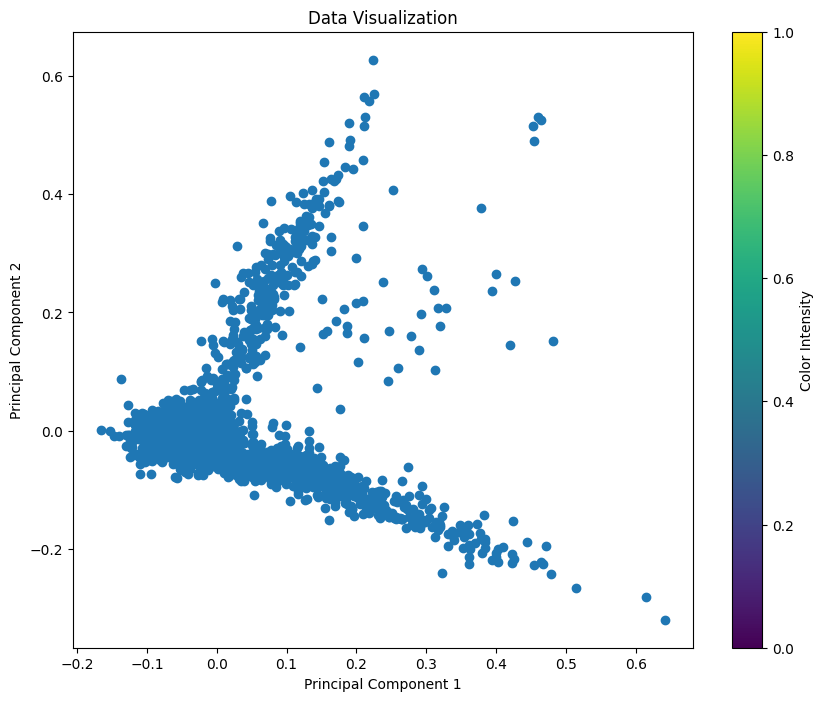

In [39]:
# Visualize PCA
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.title('Data Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Color Intensity')
plt.show()


## Finding Optimal number of clusters for K means clustering using elbow method

In [40]:
# Finding optimal number of clusters for K-Means using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
optimal_kmeans_clusters = np.argmin(wcss) + 1

optimal_kmeans_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

10

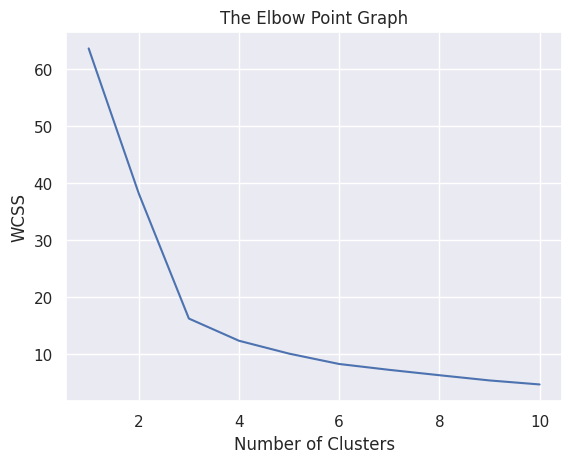

In [41]:
# Plotting the elbow point graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**From above graph we can conclude that the graph is much stable after cluster 3, so our optimal number of clusters will be 3**

## Training K means clustering

In [42]:
# Training K-Means with optimal number of clusters
optimal_kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_labels = optimal_kmeans.fit_predict(X_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Finding optimal number of clusters for K medoids using Elbow method

In [43]:
# Finding optimal number of clusters for K-Medoids using elbow method
wcss_kmedoids = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, init='k-medoids++', random_state=42)
    kmedoids.fit(X_pca)
    wcss_kmedoids.append(kmedoids.inertia_)
optimal_kmedoids_clusters = np.argmin(wcss_kmedoids) + 1


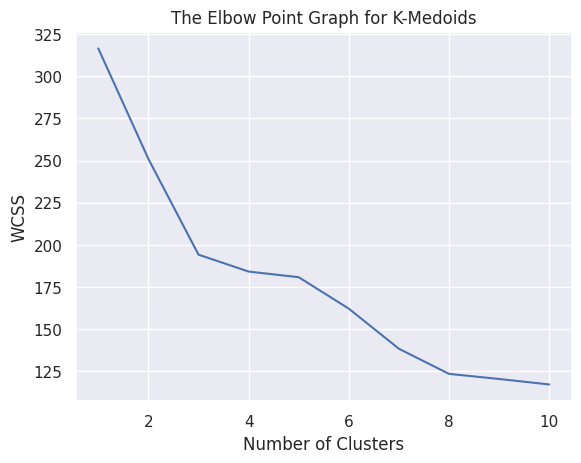

In [44]:
# Plotting the elbow point graph for K-Medoids
plt.plot(range(1, 11), wcss_kmedoids)
plt.title('The Elbow Point Graph for K-Medoids')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**From above graph we can conclude that graph is much stable after cluster 5, so our optimal number of clusters will be 5 for k medoids clustering**


## Training K medoid clustering

In [45]:
# Training K-Medoids with optimal number of clusters
optimal_kmedoids = KMedoids(n_clusters=5, init='k-medoids++', random_state=42)
kmedoids_labels = optimal_kmedoids.fit_predict(X_pca)

## Finding Optimal number of clusters for Agglomerative clustering using Dendogram

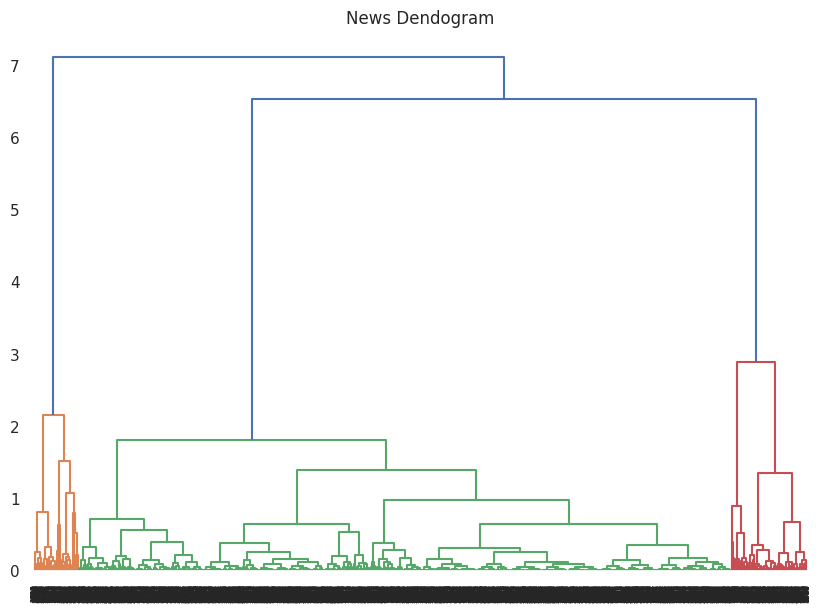

In [47]:
# Finding optimal number of clusters for Agglomerative Clustering using dendrogram
Z = shc.linkage(X_pca, method='ward')
plt.figure(figsize=(10, 7))
plt.title('News Dendogram')
dend = shc.dendrogram(shc.linkage(X_pca, method='ward'))
plt.show()


**By cutting the dendrogram horizontally along the longest line, we get 3 clusters, indicating that the optimal number of clusters for agglomerative clustering is 3.**

## Training the Agglomerative clustering

In [48]:
# Training Agglomerative Clustering with optimal number of clusters
optimal_agglomerative = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical_labels = optimal_agglomerative.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Finding optimal number of componect for Gaussian Mixture Model using BIC

In [50]:
# Finding optimal number of components for Gaussian Mixture Model (GMM) using BIC
lowest_bic = np.infty
bic = []
n_components_range = range(1, 6)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type, random_state=42)
        gmm.fit(X_pca)
        bic.append(gmm.bic(X_pca))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            optimal_gmm = gmm

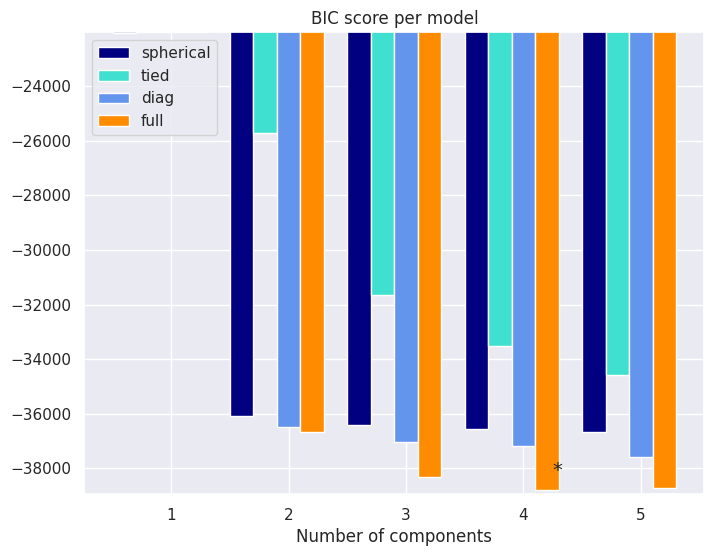

In [51]:
import itertools
# Plotting the BIC values for GMM
plt.figure(figsize=(8, 6))
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])
bars = []
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):(i + 1) * len(n_components_range)], width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([min(bic) * 1.01 - .01 * max(bic), max(bic)])
plt.title('BIC score per model')
xpos = np.mod(np.argmin(bic), len(n_components_range)) + .65 + .2 * np.floor(np.argmin(bic) / len(n_components_range))
plt.text(xpos, min(bic) * 0.97 + .03 * max(bic), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)
plt.show()

**Above BIC graph tells us that lowest BIC value is at component 4, indicating optimal number of cluster for GMM**

In [52]:
optimal_gmm

GaussianMixture(n_components=4, random_state=42)

## Training GMM model

In [53]:
# Training GMM with optimal number of components
gmm_labels = optimal_gmm.predict(X_pca)


## Finding Optimal parameters for DBSCAN using Silhoutte Score


In [94]:
# Finding optimal parameters for DBSCAN using silhouette score
best_silhouette_score = -1
optimal_eps = 0
optimal_min_samples = 0
best_dbscan_labels = None
silhouette_scores_dbscan = []  # Store silhouette scores for each combination
for eps in np.arange(0.1, 1.0, 0.1):
    for min_samples in range(2, 11):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_pca)

        # Skip calculation if only one label is present
        if len(np.unique(dbscan_labels)) == 1:
            continue

        silhouette_score_dbscan = silhouette_score(X_pca, dbscan_labels)
        silhouette_scores_dbscan.append(silhouette_score_dbscan)  # Store silhouette score

        if silhouette_score_dbscan > best_silhouette_score:
            best_silhouette_score = silhouette_score_dbscan
            optimal_eps = eps
            optimal_min_samples = min_samples
            best_dbscan_labels = dbscan_labels




In [95]:
optimal_min_samples

5

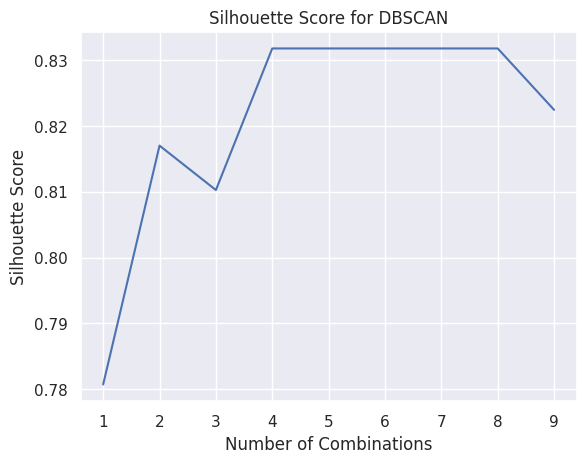

In [96]:
# Plotting the silhouette score for DBSCAN
plt.plot(range(1, len(silhouette_scores_dbscan) + 1), silhouette_scores_dbscan)
plt.title('Silhouette Score for DBSCAN')
plt.xlabel('Number of Combinations')
plt.ylabel('Silhouette Score')
plt.show()

**From above graph we have clear understanding that we get maximum score after combination 4, which indicates number of parameters to be 5**

## Training DBSCAN

In [97]:
# Training DBSCAN with optimal parameters
optimal_dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = optimal_dbscan.fit_predict(X_pca)


# Visualizing Scatter plots for all algorithms
### Each graph represents prediction of only one algorithm at a time


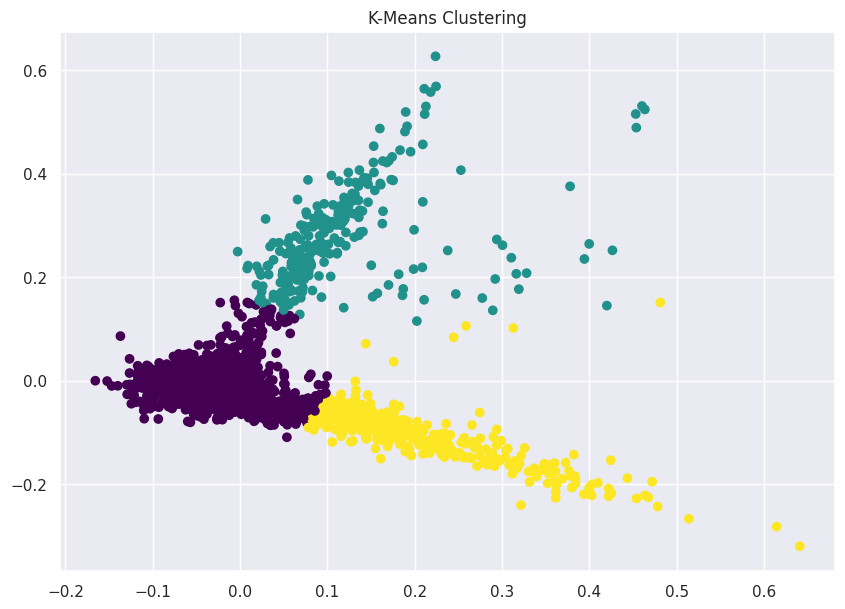

In [99]:
# Visualize the results
plt.figure(figsize=(10, 7))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


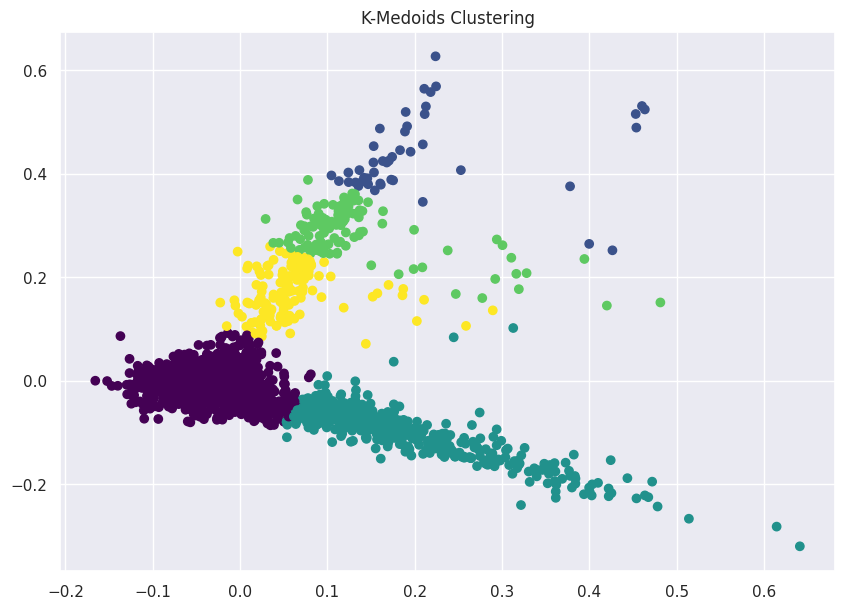

In [100]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='viridis')
plt.title('K-Medoids Clustering')
plt.show()


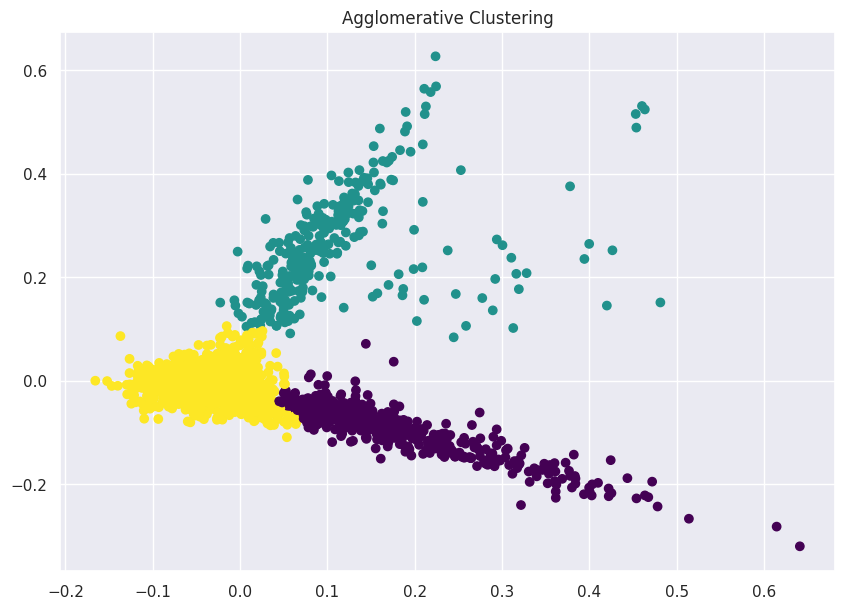

In [101]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


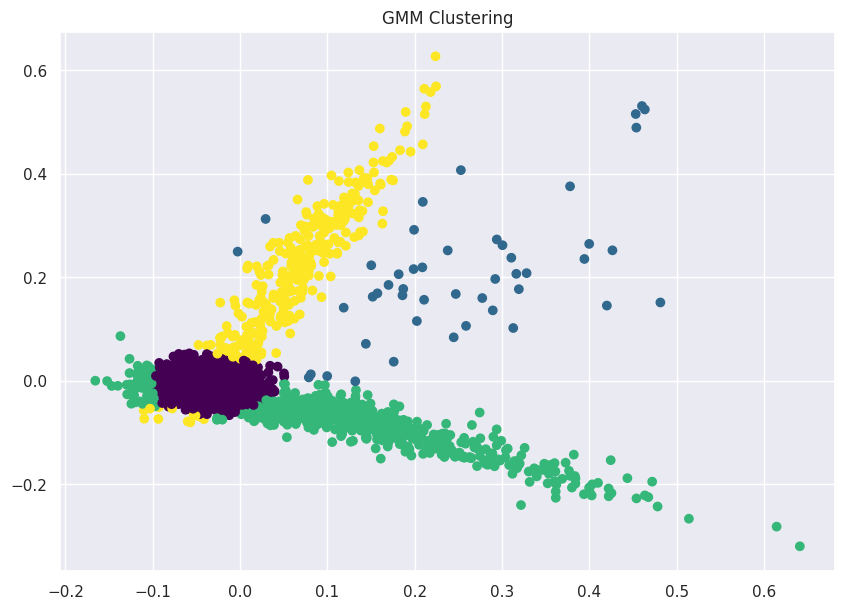

In [102]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.show()


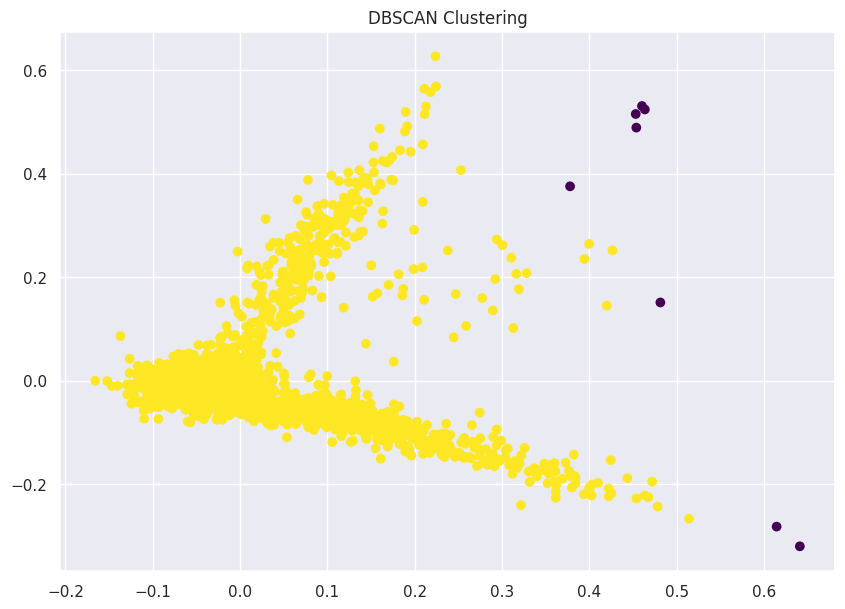

In [103]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


## Compiling Silhoutte Score for all algorithms applied
The silhouette score quantifies the compactness and separation of clusters in a clustering algorithm, with higher scores indicating better-defined clusters. Good Silhoutte Score is supposed to be between 0.5 - 1.0.

In [104]:


# Calculate silhouette score for KMeans
silhouette_score_kmeans = silhouette_score(X_pca, kmeans_labels)

# Calculate silhouette score for KMedoids
silhouette_score_kmedoid = silhouette_score(X_pca, kmedoids_labels)

# Calculate silhouette score for Agglomerative Hierarchical Clustering
silhouette_score_hierarchy = silhouette_score(X_pca, hierarchical_labels)

# Calculate silhouette score for GMM
silhouette_score_gmm = silhouette_score(X_pca, gmm_labels)

# Calculate silhouette score for DBSCAN
silhouette_score_dbscan = silhouette_score(X_pca, best_dbscan_labels)




In [105]:
# Create a DataFrame
metrics_df = pd.DataFrame({
    'Algorithm': ['KMeans', 'KMedoids', 'Agglomerative Hierarchical', 'GMM', 'DBSCAN'],
    'Silhouette Score': [silhouette_score_kmeans, silhouette_score_kmedoid, silhouette_score_hierarchy, silhouette_score_gmm, silhouette_score_dbscan]
})

# Display the DataFrame
print(metrics_df)


                    Algorithm  Silhouette Score
0                      KMeans          0.764134
1                    KMedoids          0.723807
2  Agglomerative Hierarchical          0.742063
3                         GMM          0.653543
4                      DBSCAN          0.831779


## Visualizing the Scores

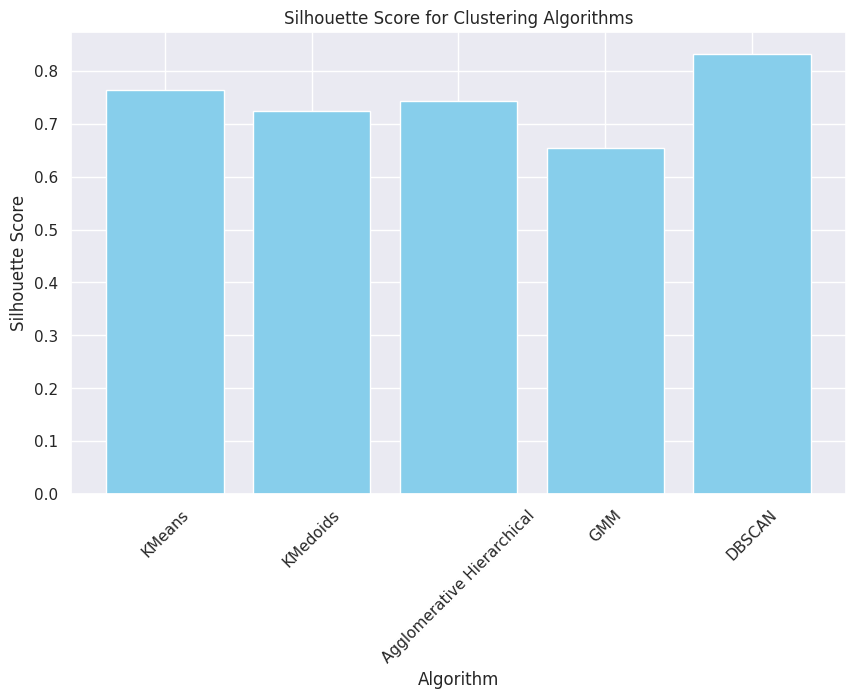

In [114]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Algorithm'], metrics_df['Silhouette Score'], color='skyblue')
plt.title('Silhouette Score for Clustering Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)
plt.show()

## **Conclusion**
If we consider the silhoutte score comparing to all algorithms, it indicates that the most optimal number of clusters can be 2 or 3. DBSCAN is having highest score indicating that its clusters are at best distance and hetrogenous in properties, but the imbalance in data count compairing both clusters is huge. On other hand we have k-mean and Agglomeraitve clusters which are also having a very good silhoutte score and also have even data points distribution. From these results we can conclude that using Agglomerative or K means clustering with 3 clusters would be the best solution for give data set. Or in some cases we can also use DBSCAN. This data set was used for fake news detection, most certainly one of these cluster will represents fake, one will represent real and one will be ambigous (maybe or maybe not) depending on true values.